In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

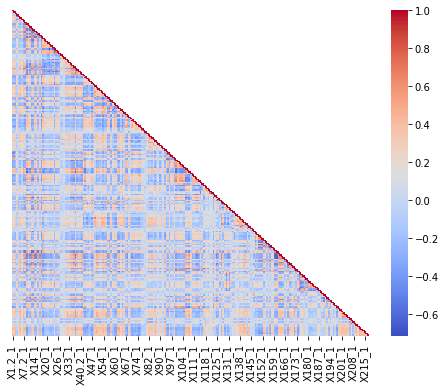

In [238]:
# your correlation matrix
df = pd.read_csv(os.path.expanduser('~/Desktop/Controlparticipants_Clusters_20.csv'))
df1 = df.drop(['Unnamed: 1','cluster'], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df1, yticklabels=False,cmap='coolwarm')

In [239]:
# turn it into a dissimilarity matrix (based on correlation distance, 1-r)
corr = df1.values
dsm1 = 1-corr

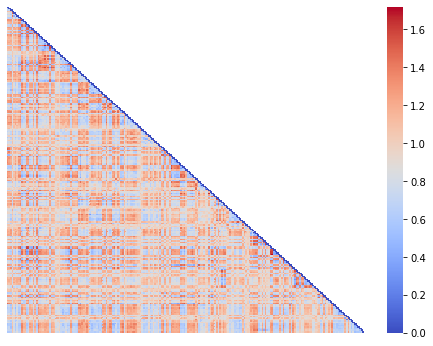

In [240]:
# plot your DSM 
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(dsm1, yticklabels=False,xticklabels=False,cmap='coolwarm')

In [2]:
proj = '/Users/ericabusch/Dropbox/Projects/DBS_roskies/'
cluster_key = pd.read_csv(proj+'question_clusters_16-25.csv')
raw_responses = pd.read_csv(proj+'Responses_cleaned_control_April2020.csv')

In [3]:
cluster_key

,clusters_16,clusters_17,clusters_18,clusters_19,clusters_20,clusters_21,clusters_22,clusters_23,clusters_24,clusters_25
0,7,3,2,2,5,2,21,2,1,22
1,7,3,2,2,5,2,21,2,1,22
2,7,3,7,9,11,9,13,2,11,1
3,13,2,16,4,3,3,17,7,17,11
4,5,11,7,18,11,9,20,12,10,10
...,...,...,...,...,...,...,...,...,...,...
215,7,3,2,9,5,2,4,2,1,22
216,7,3,2,9,5,2,4,2,1,1
217,7,3,2,9,5,2,4,2,1,1
218,11,11,8,0,13,16,13,9,14,12


In [4]:
labels = {}
for num in range(16,26):
    labels[num] = cluster_key[f'clusters_{num}']
questions = raw_responses.columns

In [23]:
## run the analysis for each number of clusters. 
cluster_RDM_results = {} # this stores our results
for num in range(16,26):
    raw_df = raw_responses.T.set_index(zip(labels[num],questions))
    across_question_correlations = squareform(pdist(raw_df.values,'correlation'))
    # within-cluster RDMs
    # go through each cluster, pull out all questions in that cluster, and compute an RDM over their responses
    within_RDMs = []
    for c in range(num): 
        indices = (labels[num] == c) # just figure out where in the raw responses that question is
        # this gives us how correlated those questions are with all the questions in the survey
        cluster_correlations = across_question_correlations[indices]
        # transposing so that the questions are features and the correlation values are samples 
        within_RDMs.append(pdist(cluster_correlations.T, 'correlation')) # correlation distance
    
    # compute RDMs across clusters - correlation distance of each cluster from each other cluster
    within_cluster_RDMs = np.array(within_RDMs)
    cluster_by_cluster_RDM = squareform(pdist(within_cluster_RDMs, 'correlation'))
    cluster_RDM_results[num] = cluster_by_cluster_RDM


Text(0.5, 1, 'survey question 16 clusters RDM')

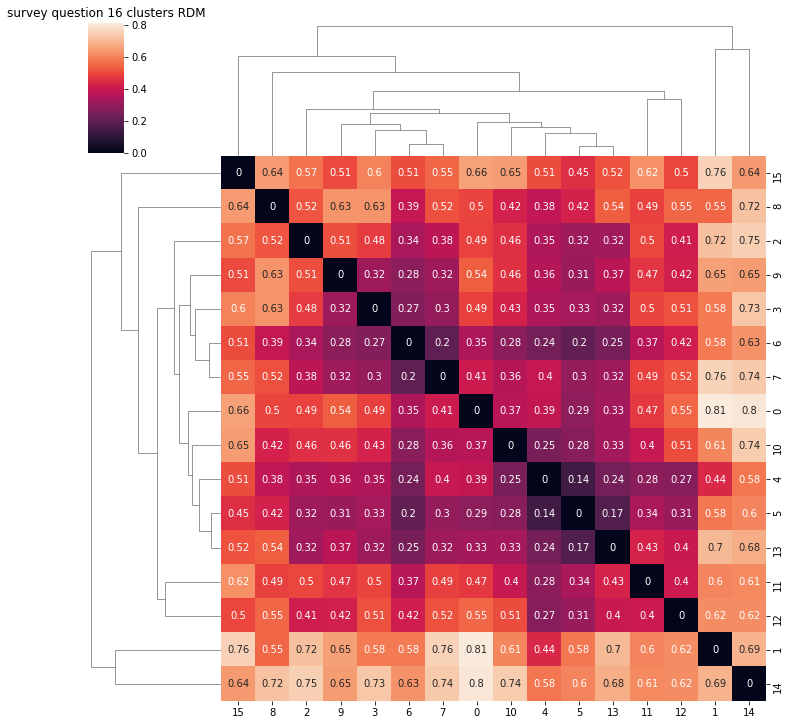

In [35]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[16],metric='correlation',annot=True)
plt.title('survey question 16 clusters RDM')

Text(0.5, 1, 'survey question 17 clusters RDM')

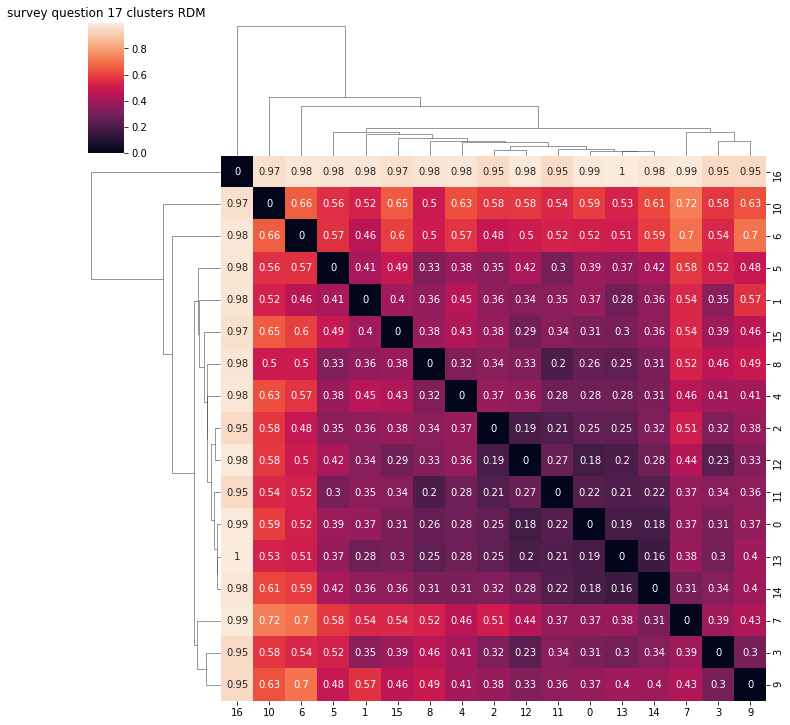

In [36]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[17],metric='correlation',annot=True)
plt.title('survey question 17 clusters RDM')

Text(0.5, 1, 'survey question 18 clusters RDM')

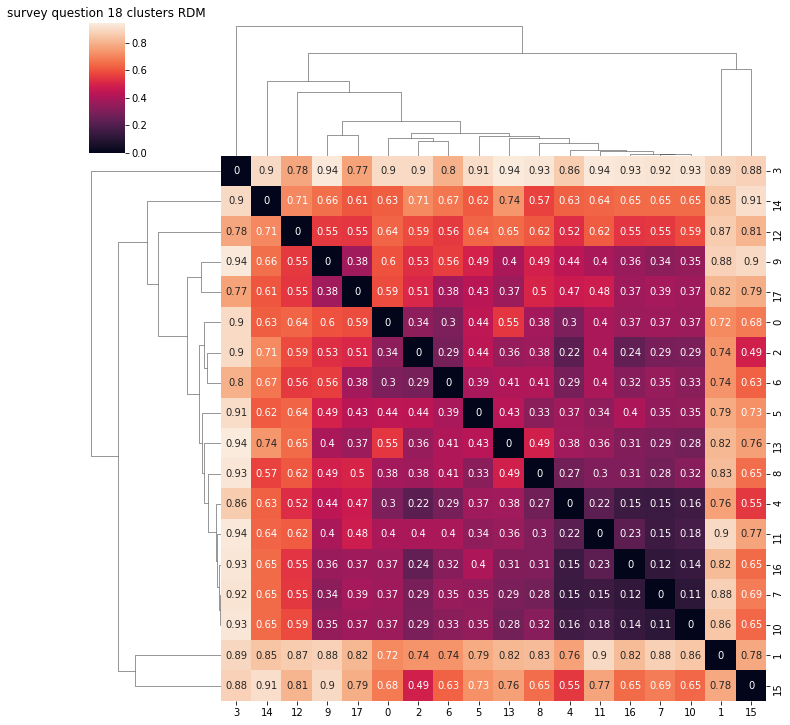

In [37]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[18],metric='correlation',annot=True)
plt.title('survey question 18 clusters RDM')

Text(0.5, 1, 'survey question 19 clusters RDM')

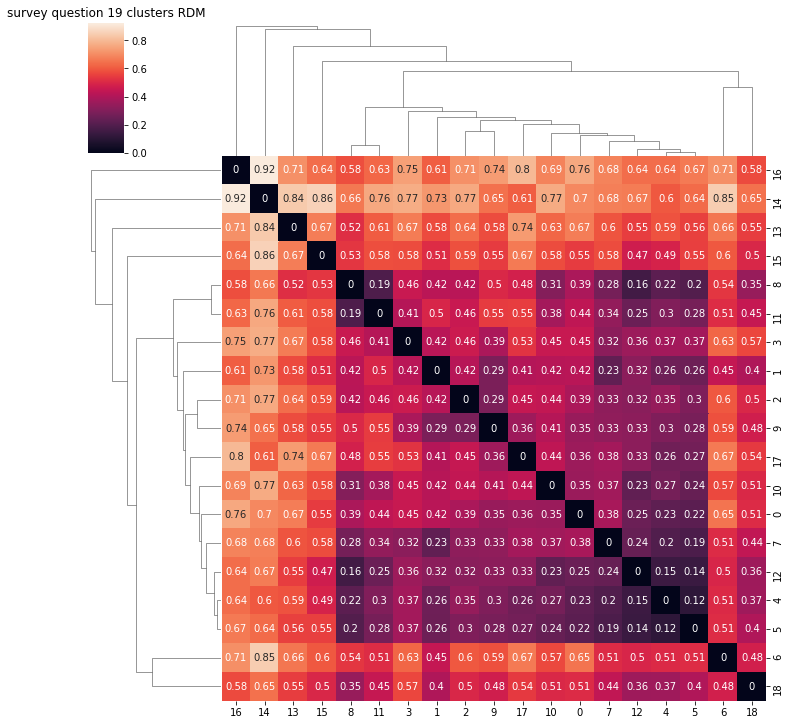

In [38]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[19],metric='correlation',annot=True)
plt.title('survey question 19 clusters RDM')

Text(0.5, 1, 'survey question 20 clusters RDM')

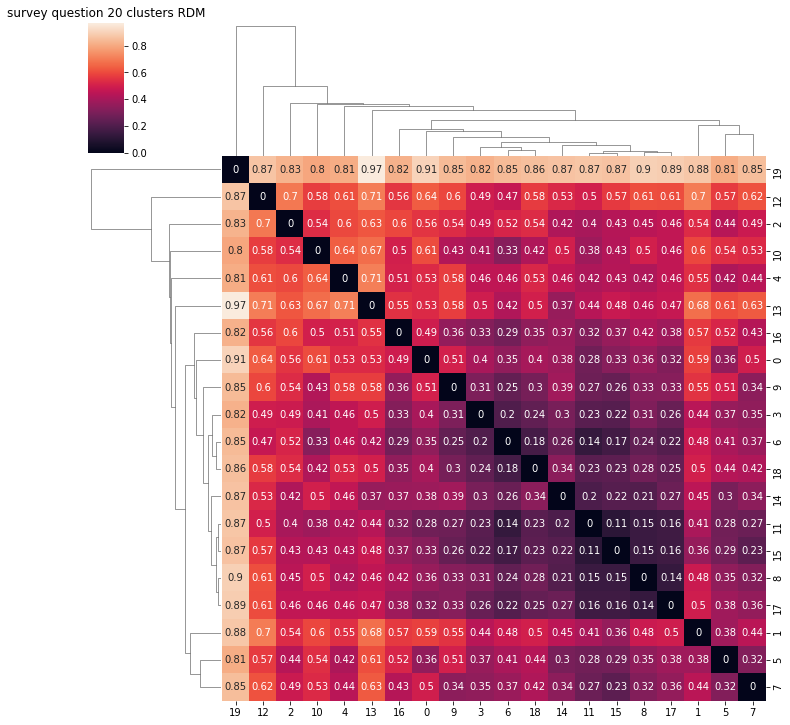

In [39]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[20],metric='correlation',annot=True)
plt.title('survey question 20 clusters RDM')

Text(0.5, 1, 'survey question 21 clusters RDM')

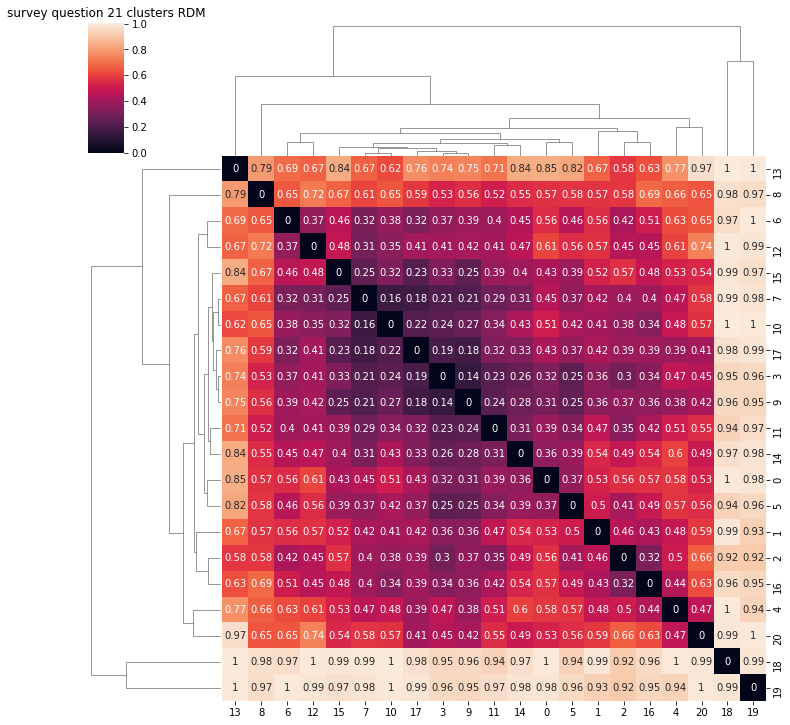

In [40]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[21],metric='correlation',annot=True)
plt.title('survey question 21 clusters RDM')

Text(0.5, 1, 'survey question 22 clusters RDM')

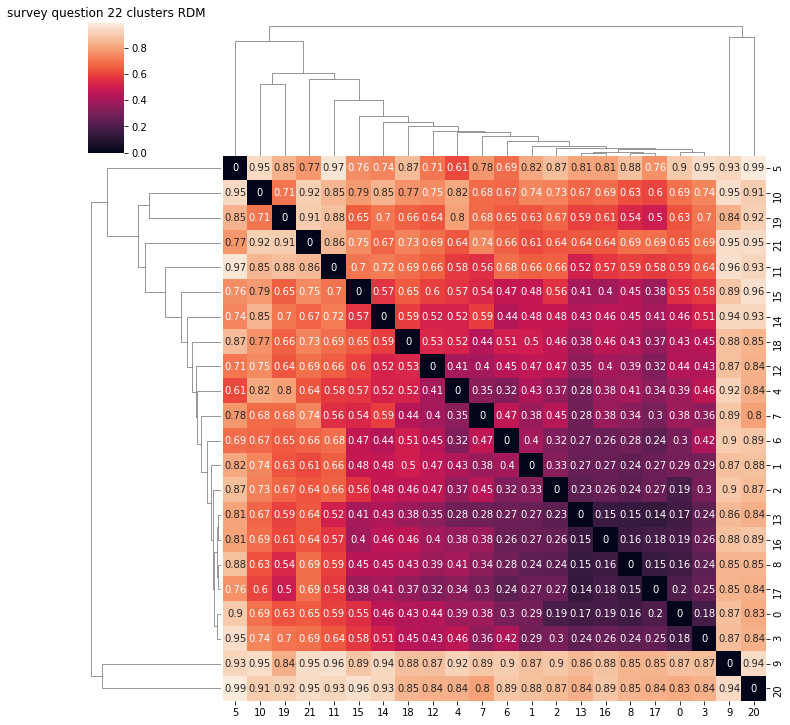

In [34]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[22],metric='correlation',annot=True)
plt.title('survey question 22 clusters RDM')

Text(0.5, 1, 'survey question 23 clusters RDM')

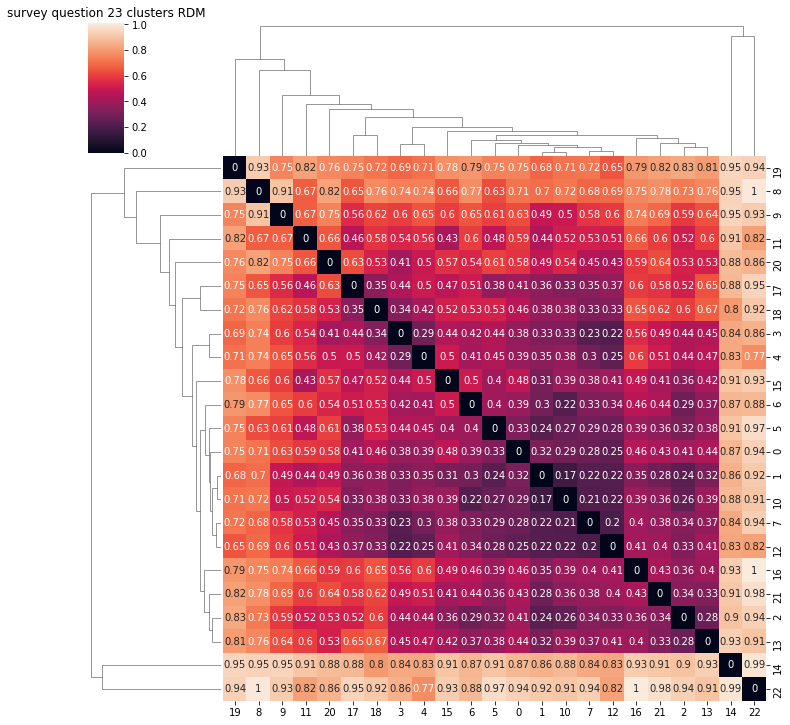

In [53]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[23],metric='correlation', annot=True)
plt.title('survey question 23 clusters RDM')

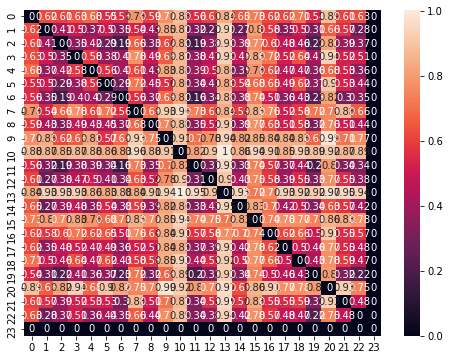

In [59]:
# # Visualize cluster RDMs
# sns.clustermap(np.nan_to_num(cluster_RDM_results[24]),metric='correlation',annot=True)
# plt.title('survey question 24 clusters RDM')
f, ax = plt.subplots(figsize=(8, 6))
b = np.nan_to_num(cluster_RDM_results[24])
sns.heatmap(b,annot=True)

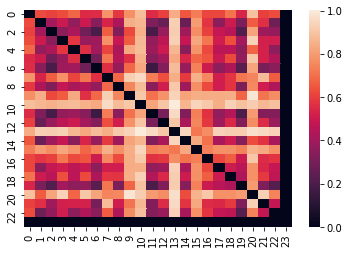

In [57]:
# Visualize cluster RDMs
plt.figsize(11,9)
sns.heatmap(np.nan_to_num(cluster_RDM_results[25]),annot=True)
plt.title('survey question 25 clusters RDM')

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

In [22]:
# transpose the data so that the questions are the features and the responses are samples
# so you wind up doing the DSM across question responses
# this shows us what question each value is (now columns are responses)
# and match clusters to questions
raw_df = raw_responses.T.set_index(cluster_labels_16)
across_question_correlations = squareform(pdist(raw_df.values,'correlation'))
sns.heatmap(across_question_correlations)
plt.title('survey question 16 clusters RDM')

NameError: name 'cluster_labels' is not defined

In [243]:
# figure out which question was in which cluster
cluster_number = pd.unique(cluster_labels)
cluster_labels = cluster_labels.to_list()

In [254]:
# within-cluster RDMs
# go through each cluster, pull out all questions in that cluster, and compute an RDM over their responses
within_RDMs = []
for c in cluster_number: 
    indices = (cluster_labels == c) # just figure out where in the raw responses that question is
    # this gives us how correlated those questions are with all the questions in the survey
    cluster_correlations = across_question_correlations[indices]
    # transposing so that the questions are features and the correlation values are samples 
    within_RDMs.append(pdist(cluster_correlations.T, 'correlation')) # correlation distance 

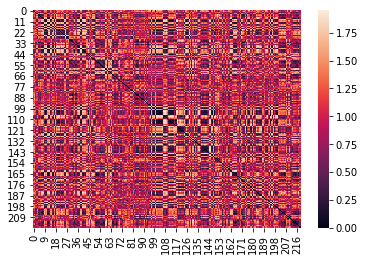

In [255]:
# if we visualize one of those, you get the representational dissimilarity matrix of all the questions 
# within that one cluster
x = within_RDMs[0]
y = within_RDMs[4]
sns.heatmap(squareform(x))

Text(0.5, 1, 'question cluster RDM')

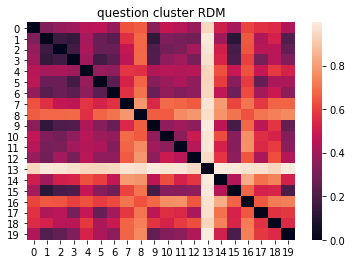

In [245]:
# compute RDMs across clusters - correlation distance of each cluster from each other cluster
within_cluster_RDMs = np.array(within_RDMs)
cluster_by_cluster_RDM = squareform(pdist(within_cluster_RDMs,'correlation'))
sns.heatmap(cluster_by_cluster_RDM)
plt.title('question cluster RDM')

In [7]:
# create 100 random matrices of 200 features, 100 samples; display one of them
random_matrices = [np.random.rand(100,200) for i in range(100)]

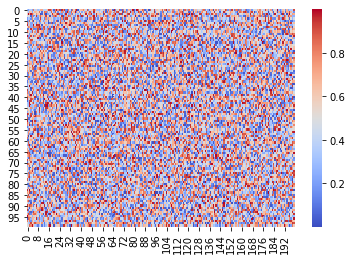

In [8]:
sns.heatmap(random_matrices[0],cmap='coolwarm')

In [28]:
# This will create a second-order RDM; comparing the similarity structure within a cluster to
# that of other clusters, given our random dataset.

In [29]:
# create arbitrary feature clusters ; 5 consecutive features per cluster, 40 clusters
clusters = np.array_split(np.arange(200), 40)
# loop through all clusters; create one RDM per cluster
rdms = []
for cluster in clusters:
    # get all the cluster data for each matrix in the cluster; vectorize
    # becomes (100, 1000) - one vectorized cluster per matrix
    cluster_data = np.array([mat[:,cluster].ravel() for mat in random_matrices])
    dsm = pdist(cluster_data, 'correlation') # dissimilarity between each cluster
    # if you want it in squareform, can do:
    #dsm_sq = squareform(dsm)
    # but as is, each DSM is the vectorized lower triangle of a correlation distance matrix
    rdms.append(dsm)

# this gives you a RDM for each cluster. (vectorized)
rdms = np.array(rdms)
cluster_rdm = squareform(pdist(rdms, 'correlation'))


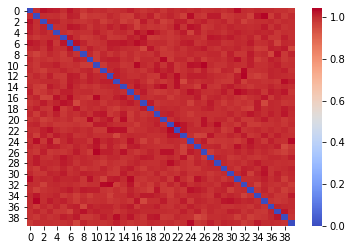

In [30]:
# since there's no structure to this data, the correlation distance between things is nearly always 1 - no correlation
# aside from along the diagonal
sns.heatmap(cluster_rdm, cmap='coolwarm')

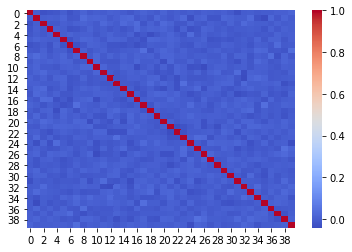

In [31]:
# can flip it to correlation
sns.heatmap(1-cluster_rdm, cmap='coolwarm')